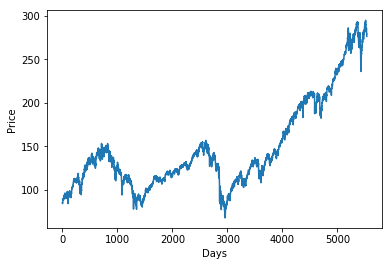

In [72]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('RNN.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


In [56]:
#Importing Libaries
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [57]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [58]:
# load the dataset
dataframe = pandas.read_csv('RNN.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [59]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [60]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

3709 1827


In [61]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=3):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [62]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [63]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [64]:
#Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 30s - loss: 0.0020
Epoch 2/100
 - 23s - loss: 5.7947e-05
Epoch 3/100
 - 23s - loss: 5.7339e-05
Epoch 4/100
 - 24s - loss: 5.5462e-05
Epoch 5/100
 - 31s - loss: 5.4259e-05
Epoch 6/100
 - 28s - loss: 5.3068e-05
Epoch 7/100
 - 30s - loss: 5.3931e-05
Epoch 8/100
 - 28s - loss: 5.2947e-05
Epoch 9/100
 - 27s - loss: 5.2091e-05
Epoch 10/100
 - 28s - loss: 5.2872e-05
Epoch 11/100
 - 30s - loss: 5.1791e-05
Epoch 12/100
 - 26s - loss: 5.3330e-05
Epoch 13/100
 - 26s - loss: 5.2851e-05
Epoch 14/100
 - 27s - loss: 5.2013e-05
Epoch 15/100
 - 26s - loss: 5.2616e-05
Epoch 16/100
 - 27s - loss: 5.2870e-05
Epoch 17/100
 - 28s - loss: 5.2560e-05
Epoch 18/100
 - 28s - loss: 5.2538e-05
Epoch 19/100
 - 28s - loss: 5.1960e-05
Epoch 20/100
 - 27s - loss: 5.3168e-05
Epoch 21/100
 - 27s - loss: 5.2476e-05
Epoch 22/100
 - 26s - loss: 5.1978e-05
Epoch 23/100
 - 27s - loss: 5.2329e-05
Epoch 24/100
 - 27s - loss: 5.1557e-05
Epoch 25/100
 - 26s - loss: 5.0824e-05
Epoch 26/100
 - 25s - loss: 5.2111e-05

In [65]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [66]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [67]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.54 RMSE
Test Score: 19.35 RMSE


In [68]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [69]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

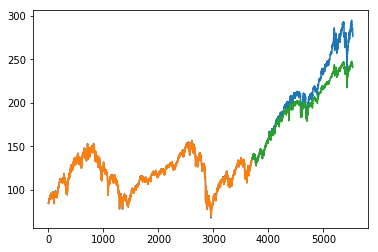

In [70]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()